## Best Neighborhood in Pittsburgh

##### Group 4 - Runtime Terror  
Akshobh Kulkarni, Anthony Lucchitti, and Ken Shegogue

## Introduction
------


## The Metric
------
Our definition of the best neighborhood in Pittsburgh revolved around safety. The first dataset we used was a 30 day police incident blotter, which offered information on incidents and their location. This dataset only contains information reported by City of Pittsburgh Police, and does not contain incidents that solely involve other police departments operating within the city (campus police, Port Authority, etc.). However, the data provided useful information to aid in determinig the safest neighborhood in Pittsburgh. This dataset 

In [22]:
# Importing pandas
import pandas as pd

# To make 2D charts and graphs from data
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
# load in the police incident data file
policeData = pd.read_csv("police-incident-blotter.csv")
# drop lines with insufficient data
policeData.drop([994,1398,1405,1413,1414,1534,1552,1583,1600,1797,1873,2197,2204,2206,2348,2489,2496,2512,2522,2637,2639,2715,2725,2796,2801,2964,3081], axis=0)
policeData.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,214368107,19220799,99,2019-10-29T13:40:00,"Cecil Pl & Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,FOUND PROPERTY,9489 Found Property,201.0,6.0,6.0,-80.003100,40.442497
1,214376833,19220899,99,2019-10-29T16:12:00,"200 Block Mayflower St Pittsburgh, PA 15206",N,Larimer,5,MISCELLANEOUS FIRE OTHER INVEST CONTINUED,9123 Miscellaneous Fire Other Investigation to...,1208.0,NaN,NaN,0.000000,0.000000
2,214379292,19220863,26,2019-10-28T16:00:00,"2600 Block Centre Ave Pittsburgh, PA 15219",Y,Terrace Village,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(4) Harassment Communicates Prohibited ...,510.0,6.0,3.0,-79.968380,40.446506
3,214379407,19221009,6,2019-10-29T15:00:00,"900 Block Beech Ave Pittsburgh, PA 15233",N,Allegheny West,1,THEFT FROM AUTO,3934 Theft from Vehicle,2201.0,NaN,NaN,0.000000,0.000000
4,214379413,19211917,6,2019-10-17T12:25:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Central Business District,2,RETAIL THEFT (SHOPLIFTING),3929 Retail Theft.,201.0,6.0,6.0,-79.996041,40.435040
5,214380175,19221016,99,2019-10-29T18:37:00,"3800 Block O Hara St Pittsburgh, PA 15213",Y,North Oakland,4,BENCH WARRANT ARREST - NO TIE,9501 Bench Warrant,403.0,NaN,NaN,0.000000,0.000000
6,-3280001155,19221042,99,2019-10-29T19:15:00,"100 Block Alluvian St Pittsburgh, PA 15207",N,Hazelwood,4,ACCIDENTAL FIRE,9018 Accidental Fire,1515.0,NaN,NaN,0.000000,0.000000
7,214386102,19221084,99,2019-10-29T20:30:00,"3400 Block Colby St Pittsburgh, PA 15214",N,Summer Hill,1,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),2612.0,NaN,NaN,0.000000,0.000000
8,214189531,19218345,99,2019-10-26T08:48:00,"Moga St Pittsburgh, PA 15206",N,East Liberty,5,DEAD ON ARRIVAL (DOA),9496 Dead on Arrival (DOA),1113.0,9.0,2.0,-79.917510,40.467180
9,214093475,19217087,6,2019-10-24T14:30:00,"600 Block Melwood Ave Pittsburgh, PA 15213",N,North Oakland,4,THEFT FROM AUTO,3934 Theft from Vehicle,507.0,6.0,3.0,-79.954181,40.457576


This dataset provides a lot of information, but we are only concerned with one column: INCIDENT NEIGHBORHOOD. With the help of the value_counts() function, counting the number of inicidents per neighborhood is easy. Yikes! Stay away from Central Business District (aka Downtown Pittsburgh).

In [24]:
#Counting number of police incidents for each neighborhood
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts())
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Aggregate Incidences'}, inplace = True)
neighborhoodCounts.head(10)

,Aggregate Incidences
Central Business District,244
South Side Flats,163
Carrick,132
Shadyside,92
East Liberty,89
Brookline,83
Mount Washington,73
Marshall-Shadeland,72
East Allegheny,65
Knoxville,62


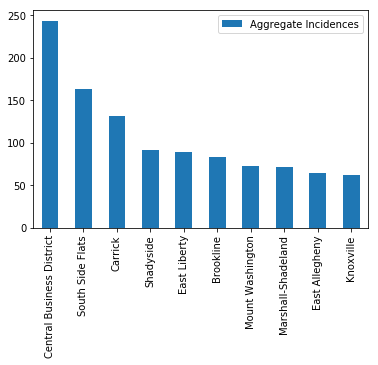

In [25]:
#plotting totals with bar graph
neighborhoodCounts.head(10).plot.bar()

As of now, we have seen the total number of incicents for every neighborhood, but what are the types of these incidents? Thanks to value_counts() again, we can easily total the types of incidents. The descriptions are mostly self-explanaorty, except for 99. "99" refers to incidents where a police officer was in need of aid or some other miscellaneous call. 

In [26]:
# What are the most popular incidents?
offenseCounts = pd.DataFrame(policeData['INCIDENTHIERARCHYDESC'].value_counts().sort_values(ascending=False))
offenseCounts.head(15)

,INCIDENTHIERARCHYDESC
99,470
THEFT,317
HIT AND RUN,317
SIMPLE ASSAULT,178
CRIM MISCHIEF,147
THEFT FROM AUTO,118
BURGLARY,110
FOUND PROPERTY,86
HARRASSMENT,79
ROBBERY,78


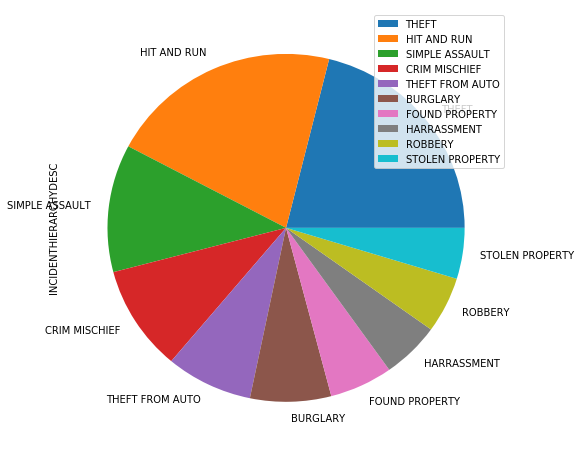

In [27]:
# Remove 99 (misc. offenses or aid)
offenseCounts.drop("99", inplace=True)
# Let's visualize this...
offenseCounts.head(10).plot.pie(y='INCIDENTHIERARCHYDESC', subplots=False, figsize=(8, 8));

We now know the number of incidents per neighborhood and the most common types of incidents. Let's combine this information to create a dataframe of the number of specific incidents per neighborhood. 

In [28]:
#Deleting irrelevant data
neighborhoodCounts.drop(["Outside County"], inplace=True)
neighborhoodCounts.drop(["Outside State"], inplace=True)

# Looking into the types of offenses for neighborhoods
offensesDF = pd.DataFrame(index =[neighborhoodCounts.index.values], columns=["HIT AND RUN", "THEFT", "SIMPLE ASSAULT", "CRIM MISCHIEF", "THEFT FROM AUTO", "BURGLARY", "FOUND PROPERTY", "HARRASSMENT", "ROBBERY", "STOLEN PROPERTY"])
for row in range(len(offensesDF)):
    for column in range(len(offensesDF.columns)):
        offensesDF.iat[row,column] = 0

currNeighborhood = ""
offense = ""
for row in range(len(policeData)) :
    currNeighborhood = policeData.iat[row,6]
    offense = policeData.iat[row,8]
    if(currNeighborhood in offensesDF.index):
        if(offense=="HIT AND RUN"):
            offensesDF.loc[currNeighborhood, "HIT AND RUN"] += 1
        elif(offense=="THEFT"):
            offensesDF.loc[currNeighborhood, "THEFT"] += 1
        elif(offense=="SIMPLE ASSAULT"):
            offensesDF.loc[currNeighborhood, "SIMPLE ASSAULT"] += 1
        elif(offense=="CRIM MISCHIEF"):
            offensesDF.loc[currNeighborhood, "CRIM MISCHIEF"] += 1
        elif(offense=="THEFT FROM AUTO"):
            offensesDF.loc[currNeighborhood, "THEFT FROM AUTO"] += 1
        elif(offense=="BURGLARY"):
            offensesDF.loc[currNeighborhood, "BURGLARY"] += 1
        elif(offense=="FOUND PROPERTY"):
            offensesDF.loc[currNeighborhood, "FOUND PROPERTY"] += 1
        elif(offense=="HARRASSMENT"):
            offensesDF.loc[currNeighborhood, "HARRASSMENT"] += 1
        elif(offense=="ROBBERY"):
            offensesDF.loc[currNeighborhood, "ROBBERY"] += 1
        elif(offense=="STOLEN PROPERTY"):
            offensesDF.loc[currNeighborhood, "STOLEN PROPERTY"] += 1

# Printing the most UNsafe neighborhoods
offensesDF.head(10)


,HIT AND RUN,THEFT,SIMPLE ASSAULT,CRIM MISCHIEF,THEFT FROM AUTO,BURGLARY,FOUND PROPERTY,HARRASSMENT,ROBBERY,STOLEN PROPERTY
Central Business District,17,31,29,8,2,0,16,8,12,3
South Side Flats,26,17,4,10,10,1,6,5,6,0
Carrick,14,11,11,10,8,7,0,4,2,1
Shadyside,11,9,4,3,2,15,5,2,0,0
East Liberty,10,10,5,6,4,2,1,5,2,1
Brookline,8,6,4,3,1,3,0,3,6,1
Mount Washington,10,4,2,4,9,3,1,2,2,2
Marshall-Shadeland,2,4,11,5,2,3,3,2,1,0
East Allegheny,6,3,0,2,0,5,4,1,0,3
Knoxville,5,5,7,2,0,4,1,2,3,3


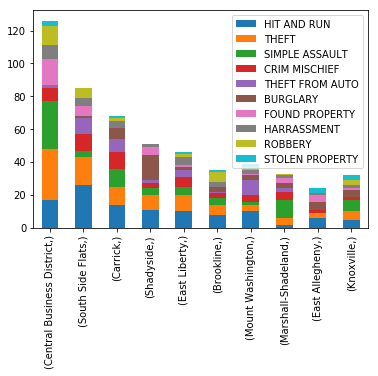

In [29]:
# Stacked bar graph visualization of most UNsafe neighborhoods
offensesDF.head(10).plot.bar(stacked=True)

According to the data from the 30 day police incident blotter, Central Business District is arguably the most unsafe neighborhood in Pittsburgh with 244 incidents. However, the goal of this project is the find the **safest** neighborhood in Pittsburgh. We already have the data, we simply need to look at it the other way. Let's look at the total incidents per neighorhood in ascending order. 

In [30]:
# Remember, we're trying find the MOST safe neighborhood
# Looking at list in opposite order
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True))
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Incidences'}, inplace=True)
neighborhoodCounts.head(10)

,Incidences
Arlington Heights,1
Outside County,1
Regent Square,2
Swisshelm Park,2
New Homestead,2
Mount Oliver,3
Oakwood,3
Ridgemont,3
East Carnegie,3
Outside State,4


In [31]:
neighborhoodCounts.drop(index=["Outside County", "Outside State"], inplace=True)
neighborhoodCounts.head(10)

,Incidences
Arlington Heights,1
Regent Square,2
Swisshelm Park,2
New Homestead,2
Mount Oliver,3
Oakwood,3
Ridgemont,3
East Carnegie,3
Hays,4
St. Clair,5


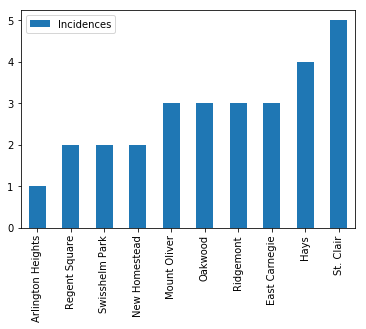

In [32]:
#plotting totals with bar graph
neighborhoodCounts.head(10).plot.bar()

In [33]:
# What crimes are happening in the safest neighborhoods?
offensesDF.tail(10)

,HIT AND RUN,THEFT,SIMPLE ASSAULT,CRIM MISCHIEF,THEFT FROM AUTO,BURGLARY,FOUND PROPERTY,HARRASSMENT,ROBBERY,STOLEN PROPERTY
Windgap,0,1,0,1,0,0,0,0,0,0
Hays,1,0,0,0,0,0,0,0,0,0
East Carnegie,0,0,0,0,0,0,0,1,0,0
Ridgemont,0,0,0,0,0,0,0,0,0,1
Oakwood,0,1,1,0,0,0,0,0,0,0
Mount Oliver,1,2,0,0,0,0,0,0,0,0
Swisshelm Park,0,0,0,0,1,0,0,0,1,0
Regent Square,0,0,0,0,1,0,0,0,0,0
New Homestead,0,0,1,0,0,0,0,0,0,0
Arlington Heights,0,1,0,0,0,0,0,0,0,0


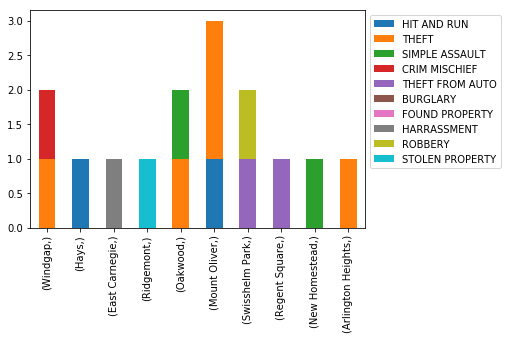

In [34]:
# Pie chart visualization of most safe neighborhoods
offensesDF.tail(10).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))

This stacked bar graph is not the best representation of the safest neighorhoods since it only accounts for the 10 most common incidents, not the other 38 less popular incidents. Regardless, Arlington Heights came out on top with only 1 incident.
## Time Out

Arlington Heights is possibly the smallest neighborhood in pgh, so it would make sense that few crimes occur there. Let's look into this some more...

Below is a map of Pittsburgh with Arlington Heights outlined in red.
![Arlington Heights Map](https://s4awnq.bn.files.1drv.com/y4mQU7MYUqjtnZt1Pg0zfvPXd3dd5GGhSramyLxmXr5kaJkXRDY51xC41TWcAl7787K9nI2D5RYxuhF5f3SrXcl0lmwX4IGFRJEQiBA5wiwqDUvyUDhORik_u7InO1oqC9NOsIizD3wsBhT8e3TPerfGwfrCZKsoblzQhwaj4bkOxFTnBQhmjEqSM6toPl0kO-XNIT8FGE2uad8oF_8p6bmIA?width=1920&height=898&cropmode=none)
Arlington Heights has about two streets, and the "main drag" appears to be quite desolate.
![Arlington Heights Street View](https://s4b7wa.bn.files.1drv.com/y4mfwRVnAIZqKncpRk7yM9ip-5smmy0b71OMav4QtZ0jo-Bnr3F36uMPtrw6_10G-S4lpsJzNDim4Nbs5TZ4IFZEQNnDhEZAnw61cV92GeCnj1E_lDmScEk3u08tkuWbnqTtVeTTN-7SNWINQ1a9PhLUs8irPguOs1D7ay6P69ozz76SWQA_VdDk0Qx8YMv7d0m-x_8MfODabgxKWt5BxafEw?width=1920&height=900&cropmode=none)

In order to further support our claim of the safest neighborhood in Pittsburgh, more data is needed to confirm our previous findings. With that, what about how many people live in each neighborhood? Thanks to SNAP census data, we can use the population of each neighborhood to refine our results. Let's import the data.

In [35]:
# load in the neighborhood population data file
housingData = pd.read_csv("Housing.csv")

housingData.head()

,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
0,Allegheny Center,3,933,675,"1,052",51.50%,48.50%,535,10.10%,89.90%,...,1.30%,"$86,500","$109,535","$136,300",24.40%,NaN,0,0,0,0.00%
1,Allegheny West,3,462,390,355,74.90%,25.10%,203,18.20%,81.80%,...,57.40%,"$159,700","$202,228","$123,600",-38.90%,"$309,940",7,0,1,0.30%
2,Allentown,6,2500,"1,505","1,291",80.00%,20.00%,953,59.20%,40.80%,...,62.90%,"$34,300","$43,434","$42,200",-2.80%,"$8,500",70,27,11,0.90%
3,Arlington,7,1869,880,886,86.60%,13.40%,754,65.40%,34.60%,...,72.30%,"$38,800","$49,132","$44,200",-10.00%,"$15,397",34,12,13,1.50%
4,Arlington Heights,7,244,557,148,91.20%,8.80%,139,18.70%,81.30%,...,9.20%,"$45,000","$56,984","$64,400",13.00%,NaN,0,0,0,0.00%


In [36]:
# What does all this data mean???
# Let's focus on each neighborhood's population

# Delete irrelevant columns
housingData.drop(["Sector #", "Total # Units (2000)", "Total # Units (2010)", "% Occupied Units (2010)", "% Vacant Units (2010)", "# Occupied Units (2010)", "% Owner Occupied Units (2010)", "% Renter Occupied Units (2010)", "Est. Avg. Yrs. of Residence (2010)", "% Living in Household (2010)", "% Living in Group Quarters (2010)", "% Units Built 00-09", "% Units Built 90-99", "% Units Built 80-89", "% Units Built 60-79", "% Units Built 40-59", "% Units Built before 1939", "Median Home Value (2000)", "Med. Val. ('00 in '10 Dollars)", "% Change Real Value 2000-2010", "Median Sale Price (2010)", "% Change Real Value 2000-2010", "Median Sale Price (2010)", "# Sales Counted (2010)", "Foreclosures (2008)", "Foreclosures (2010)", "% of all Housing Units Foreclosed (2010)"], axis=1, inplace=True); housingData = housingData.drop(housingData.columns[2], axis=1); housingData.rename(columns={'Population (2010)':'Population'}, inplace=True) 
housingData.head(10)

,Neighborhood,Population
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244
5,Banksville,4144
6,Bedford Dwellings,1202
7,Beechview,7974
8,Beltzhoover,1925
9,Bloomfield,8442


Now we have a wonderful dataframe with the neighborhoods and their corresponding population. In order to make this useful, we need to compare to our previous data of the number of incidents per neighborhood. Pandas can graciously do this for us with the merge capability. 

In [ ]:
#making dataframes compatable with one another...must make row names into column
neighborhoodCounts.index.name = 'Neighborhood'
neighborhoodCounts.reset_index(inplace=True)
# Now let's merge this with the neighborhood police incident totals
newDFmerge2 = pd.merge(housingData, neighborhoodCounts)
newDFmerge2.head(10)

With that, we can use both the population and incidences column to determine an "Inicidence per Person" value.

In [ ]:
# Now let's find the incidence per person to better standardize our data
newDFmerge2['Incidence per Person'] = newDFmerge2.apply(lambda row: row.Incidences/float(row.Population), axis = 1)
newDFmerge2.head(10)

In [ ]:
# Sort this list so we can make a conclusion
newDFmerge2.sort_values(by="Incidence per Person", ascending=True, inplace=True)
newDFmerge2.head(15)

## The Best Neighborhood
------
# <font color=red>*Swisshelm Park*</font>


## Conclusion
------